Importing pandas ; Importing seaborn ; Importing matplotlib ; Importing monthly progress prediction by book value

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_progress=pd.read_csv('../data/output/monthly-progress-by-book-value.csv',sep=';')


Defining get bounds functions

In [168]:
def get_lower_upper_bound(df):
    months=df['Month'].unique()
    lower_bound = []
    upper_bound = []

    for month in months:
        q1 = df_progress[df_progress['Month'] == month]['Progress'].quantile(0.25)
        q3 = df_progress[df_progress['Month'] == month]['Progress'].quantile(0.75)
        iqr = q3 - q1
        lower_bound.append(q1 - 1.5 * iqr)
        upper_bound.append(q3 + 1.5 * iqr)  
        
    return lower_bound, upper_bound



Defining remove outliers function

In [169]:
def remove_outliers(df,lower_bound,upper_bound):
    months=df['Month'].unique()
    df_cleaned=pd.DataFrame()
    
    for month in months:
        df_cleaned=pd.concat([df_cleaned,df[(df['Month']==month)&(df['Progress']>=lower_bound[month-1])&(df['Progress']<=upper_bound[month-1])]])
    return df_cleaned
    

Creating dataframe from 2014 ; Creating dataframe from 2017

In [170]:
df_progress_2014=df_progress[df_progress['Year']>=2014]
df_progress_2017=df_progress[df_progress['Year']>=2017]

Removing outliers from both dataframe

In [171]:
bounds_2014=get_lower_upper_bound(df_progress_2014)
df_cleaned_progress_2014=remove_outliers(df_progress_2014,bounds_2014[0],bounds_2014[1])

bounds_2017=get_lower_upper_bound(df_progress_2017)
df_cleaned_progress_2017=remove_outliers(df_progress_2017,bounds_2017[0],bounds_2017[1])

Visualizing monthly progress from 2014 and 2018

Text(0.5, 1.0, 'From 2017')

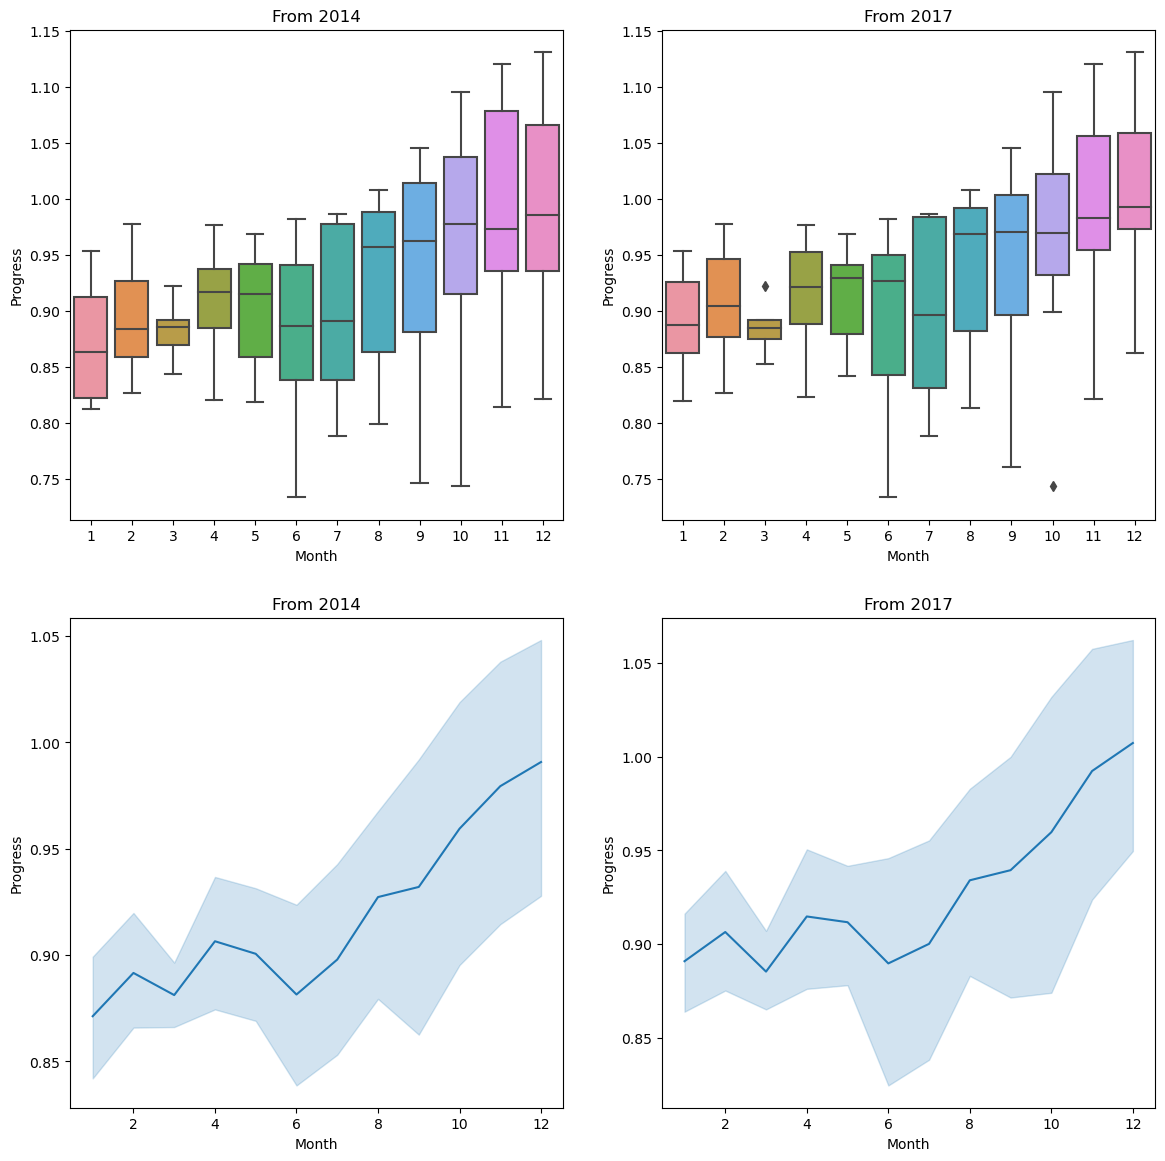

In [172]:
fig, axs = plt.subplots(2, 2, figsize=(14,14))

sns.boxplot(x='Month', y='Progress', data=df_cleaned_progress_2014,ax=axs[0,0])
axs[0,0].set_title('From 2014')

sns.boxplot(x='Month', y='Progress', data=df_cleaned_progress_2017,ax=axs[0,1])
axs[0,1].set_title('From 2017')

sns.lineplot(x='Month', y='Progress', data=df_cleaned_progress_2014,ax=axs[1,0])
axs[1,0].set_title('From 2014')

sns.lineplot(x='Month', y='Progress', data=df_cleaned_progress_2017,ax=axs[1,1])
axs[1,1].set_title('From 2017')

Calculating mean of monthly progress from both dataframe

In [173]:
df_merged_progress=pd.DataFrame()
df_merged_progress['2014']=df_cleaned_progress_2014.groupby('Month')['Progress'].mean()
df_merged_progress['2017']=df_cleaned_progress_2017.groupby('Month')['Progress'].mean()
print(df_merged_progress.head(12))


           2014      2017
Month                    
1      0.871269  0.890891
2      0.891620  0.906478
3      0.881210  0.885344
4      0.906517  0.914775
5      0.900617  0.911699
6      0.881482  0.889714
7      0.897911  0.900157
8      0.927292  0.934079
9      0.932053  0.939477
10     0.959443  0.959753
11     0.979435  0.992403
12     0.990799  1.007348
